In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
__author__ = "Gökhan Özeloğlu"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
path = "/content/drive/My Drive/ML_Term_Project/"
data = pd.read_csv(path + "dataset_2.csv")
data_df = pd.DataFrame(data)

In [4]:
data_df.head()

,Unnamed: 0,Unnamed: 0.1,file_id,label,Tweet
0,0,0,12834217_1,noHate,"As of March 13th , 2014 , the booklet had been..."
1,1,1,12834217_2,noHate,In order to help increase the booklets downloa...
2,2,2,12834217_3,noHate,( Simply copy and paste the following text int...
3,3,3,12834217_4,hate,Click below for a FREE download of a colorfull...
4,4,4,12834217_5,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [0]:
data_df = data_df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [6]:
data_df.head()

,file_id,label,Tweet
0,12834217_1,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,noHate,In order to help increase the booklets downloa...
2,12834217_3,noHate,( Simply copy and paste the following text int...
3,12834217_4,hate,Click below for a FREE download of a colorfull...
4,12834217_5,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [0]:
X = data_df.drop(["label"], axis=1)
y = data_df.drop(["Tweet"], axis=1)

In [0]:
"""
@:param range_list represents x-axis values. If your x-axis values are in (1, 20) range,
plot's x-axis's in (1, 20) range.
@:param value_list represents accuracy values
@:param title_str is your plot's title. It must be in string type. 
@:param x_label_str is your x-axis title. For example, 'C values'
@:param y_label_str is your y-axis title. For example, 'Accuracies'
"""

def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [0]:
def feature_extract(train_text, stop_word=True, n_gram=(1, 1)):
    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    return train_feature_set

In [0]:
X = data_df['Tweet'].values.astype('U')
temp_y = data_df["label"].values.astype('U')
X = feature_extract(X)
y = []
for label in temp_y:
    if label == "hate":
        y.append(1)
    else:
        y.append(0)


In [0]:
# Cross-validation test
clf = svm.SVC(gamma="scale")
cv_score_list = []
for c in tqdm(range(3, 20)):
    scores = cross_val_score(clf, X, y, cv=c)
    cv_score_list.append(scores.mean())

100%|██████████| 17/17 [47:11<00:00, 282.28s/it]


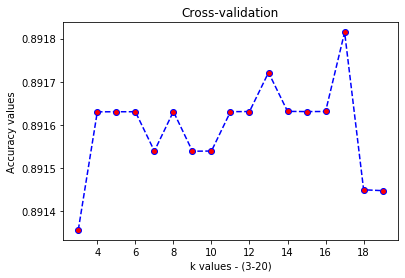

In [0]:
for i in range(len(cv_score_list)):
    cv_score_list[i] = cv_score_list[i].mean()
draw_plot(range(3, 20), cv_score_list, "Cross-validation", "k values - (3-20)", "Accuracy values" )

In [11]:
c_acc_list = []
for c in range(1, 21):
    clf = svm.SVC(C=c, kernel="rbf", gamma="scale", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

Accuracy C: 1 :  0.891539118840934
Accuracy C: 2 :  0.8942805154842086
Accuracy C: 3 :  0.8952849142813439
Accuracy C: 4 :  0.895102098772105
Accuracy C: 5 :  0.8950105239864475
Accuracy C: 6 :  0.8951018481873607
Accuracy C: 7 :  0.8950104405091158
Accuracy C: 8 :  0.8950104405091158
Accuracy C: 9 :  0.8950104405091158
Accuracy C: 10 :  0.8950104405091158
Accuracy C: 11 :  0.8950104405091158
Accuracy C: 12 :  0.8950104405091158
Accuracy C: 13 :  0.8950104405091158
Accuracy C: 14 :  0.8950104405091158
Accuracy C: 15 :  0.8950104405091158
Accuracy C: 16 :  0.8950104405091158
Accuracy C: 17 :  0.8950104405091158
Accuracy C: 18 :  0.8950104405091158
Accuracy C: 19 :  0.8950104405091158
Accuracy C: 20 :  0.8950104405091158


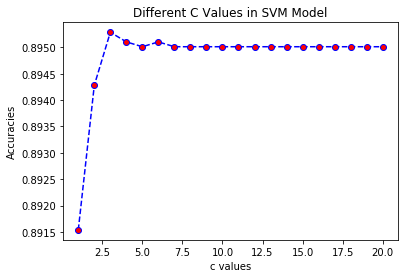

In [12]:
draw_plot(range(1, 21), c_acc_list, "Different C Values in SVM Model", "c values", "Accuracies")

In [22]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)
c += 1
print(c)

3


In [23]:
kernel_acc_list = []
for ker in ["linear", "poly", "rbf", "sigmoid"]:
    clf = svm.SVC(kernel=ker, gamma="scale", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    kernel_acc_list.append(scores.mean())
    print("Accuracy", ker, ": ", scores.mean())

Accuracy linear :  0.8912648959589481
Accuracy poly :  0.8913562201598613
Accuracy rbf :  0.8913562201598613
Accuracy sigmoid :  0.8909907562487958


In [0]:
for c in range(1, 100, 5):
    #for gam in ["auto", "scale"]:
    X_train, X_test = feature_extract(train_text, test_text)
    clf = svm.SVC(C=c, kernel="linear", gamma="scale", random_state=42) 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy C =", c, "linear: ", metrics.accuracy_score(y_test, y_pred))

In [0]:
X = data_df['Tweet'].values.astype('U')
temp_y = data_df["label"].values.astype('U')
X = feature_extract(X, stop_word=False)
y = []
for label in temp_y:
    if label == "hate":
        y.append(1)
    else:
        y.append(0)


In [0]:
clf = svm.SVC(C=3, gamma="scale")
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy with stopwords : ", score.mean())

In [26]:
acc_with_stop = []
acc_wout_stop = []
for i in range(1, 6):
    for stop_word in [True, False]:
        X = data_df['Tweet'].values.astype('U')
        temp_y = data_df["label"].values.astype('U')
        X = feature_extract(X, stop_word=stop_word, n_gram=(i, i))
        y = []
        for label in temp_y:
            if label == "hate":
                y.append(1)
            else:
                y.append(0)

        clf = svm.SVC(C=c, gamma="scale")
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            print("Accuracy without stopwords", (i, i), ":" , scores.mean())
            acc_wout_stop.append(scores.mean())
        else:
            print("Accuracy with stopwords", (i,i), ":" , scores.mean())
            acc_with_stop.append(scores.mean())

Accuracy without stopwords (1, 1) : 0.8952849142813439
Accuracy with stopwords (1, 1) : 0.8978428271384791
Accuracy without stopwords (2, 2) : 0.891173488280703
Accuracy with stopwords (2, 2) : 0.8913564708973544
Accuracy without stopwords (3, 3) : 0.8913562201598613
Accuracy with stopwords (3, 3) : 0.8913562201598613
Accuracy without stopwords (4, 4) : 0.8913562201598613
Accuracy with stopwords (4, 4) : 0.8913562201598613
Accuracy without stopwords (5, 5) : 0.8913562201598613
Accuracy with stopwords (5, 5) : 0.8913562201598613


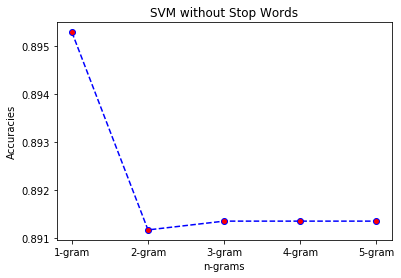

In [27]:
ranges = ["1-gram", "2-gram", "3-gram", "4-gram", "5-gram"]
draw_plot(ranges, acc_wout_stop, "SVM without Stop Words", "n-grams", "Accuracies")

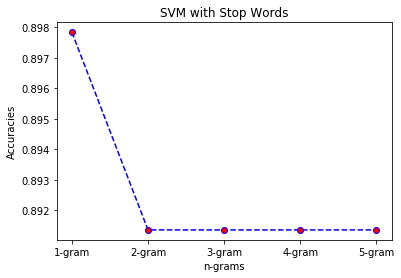

In [28]:
draw_plot(ranges, acc_with_stop, "SVM with Stop Words", "n-grams", "Accuracies")